In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Titanic_train.csv')

In [5]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S


In [6]:
##Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
### Summary statistics for numerical columns

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
##missing values in each column
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# Total missing values and percentage of missing values
missing_count = df.isna().sum()
missing_percentage = (missing_count / len(df)) * 100

# Combine into one DataFrame for better display
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percentage.round(2)
})

# Show only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0]
print(missing_df)


          Missing Count  Missing %
Age                 177      19.87
Cabin               687      77.10
Embarked              2       0.22


In [10]:
##Handling missing values
df.Age.fillna(df.Age.median(),inplace=True)
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

In [11]:
##dropping Cabin column
df.drop('Cabin',axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


In [14]:
df.Survived = df.Survived.astype('category')

In [15]:
df.Pclass=df.Pclass.astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 64.8+ KB


In [17]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


In [18]:
##Encoding categorical Columns
#Encode Sex to 0 and 1
df.Sex=df.Sex.map({'male':0,'female':1})

In [19]:
#one-hot encode "Embark"
df=pd.get_dummies(df,columns=['Embarked'])

In [20]:
df.Sex.value_counts()

,count
Sex,
0,577
1,314


In [21]:
df.Embarked_C.value_counts()

,count
Embarked_C,
False,723
True,168


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked_C   891 non-null    bool    
 11  Embarked_Q   891 non-null    bool    
 12  Embarked_S   891 non-null    bool    
dtypes: bool(3), category(2), float64(2), int64(4), object(2)
memory usage: 60.4+ KB


In [23]:
##Feature Engineering
# Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch']

# Create IsAlone
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Optional: Simplify rare titles
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked_C   891 non-null    bool    
 11  Embarked_Q   891 non-null    bool    
 12  Embarked_S   891 non-null    bool    
 13  FamilySize   891 non-null    int64   
 14  IsAlone      891 non-null    int64   
 15  Title        891 non-null    object  
dtypes: bool(3), category(2), float64(2), int64(6), object(3)
memory usage: 81.3+ KB


In [25]:
df.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Title
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,True,False,False,1,0,Mrs
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",1,22.0,1,0,113776,66.6000,False,False,True,1,0,Mrs
368,369,1,3,"Jermyn, Miss. Annie",1,28.0,0,0,14313,7.7500,False,True,False,0,1,Miss
91,92,0,3,"Andreasson, Mr. Paul Edvin",0,20.0,0,0,347466,7.8542,False,False,True,0,1,Mr
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",0,3.0,4,2,347077,31.3875,False,False,True,6,0,Master
336,337,0,1,"Pears, Mr. Thomas Clinton",0,29.0,1,0,113776,66.6000,False,False,True,1,0,Mr
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,False,False,True,0,1,Mr
443,444,1,2,"Reynaldo, Ms. Encarnacion",1,28.0,0,0,230434,13.0000,False,False,True,0,1,Miss
804,805,1,3,"Hedman, Mr. Oskar Arvid",0,27.0,0,0,347089,6.9750,False,False,True,0,1,Mr
56,57,1,2,"Rugg, Miss. Emily",1,21.0,0,0,C.A. 31026,10.5000,False,False,True,0,1,Miss


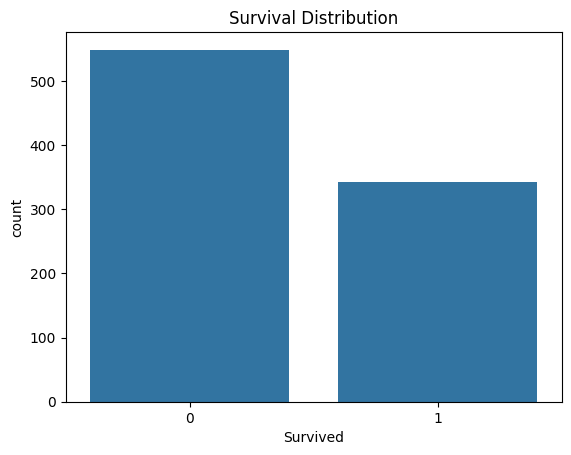

In [26]:
##Visualisation

sns.countplot(x='Survived',data=df)
plt.title("Survival Distribution")
plt.show()

<Axes: xlabel='Pclass'>

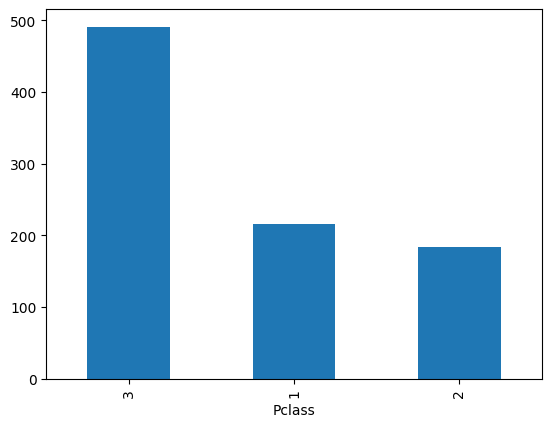

In [27]:
df.Pclass.value_counts().plot.bar()

<Axes: xlabel='Pclass'>

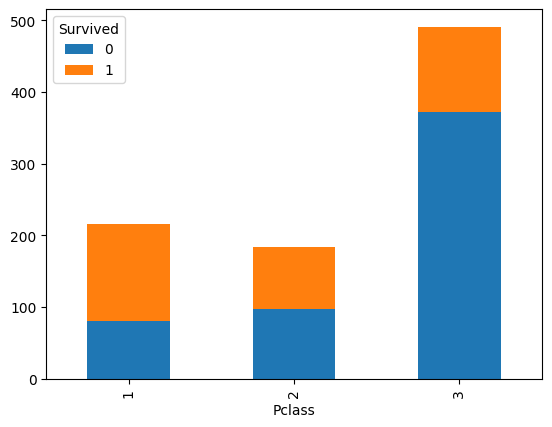

In [28]:
##survival vs Pclass

pd.crosstab(df.Pclass, df.Survived).plot.bar(stacked = True)

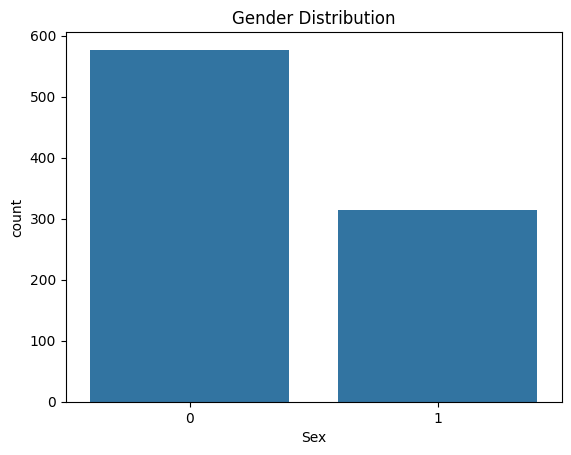

In [29]:
sns.countplot(x='Sex',data=df)
plt.title("Gender Distribution")
plt.show()

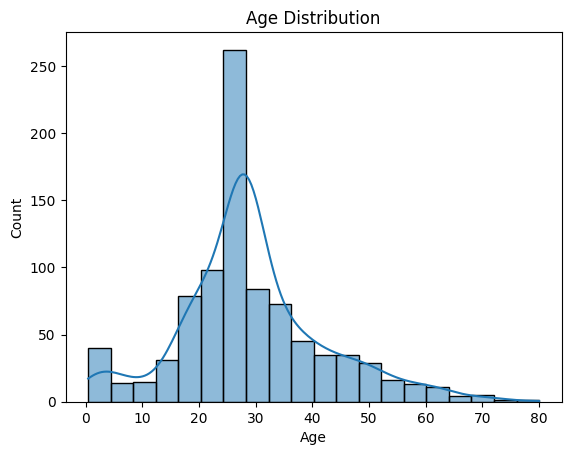

In [30]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

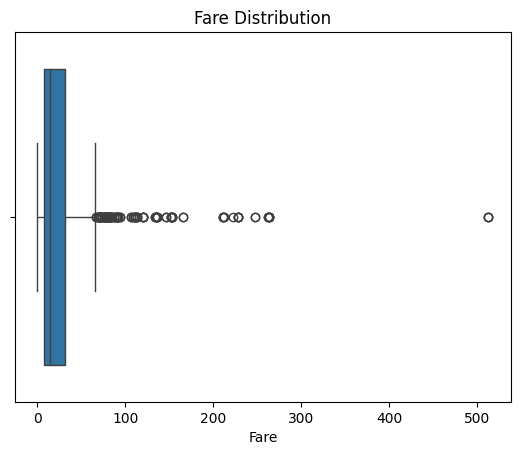

In [31]:
sns.boxplot(x='Fare', data=df)
plt.title("Fare Distribution")
plt.show()

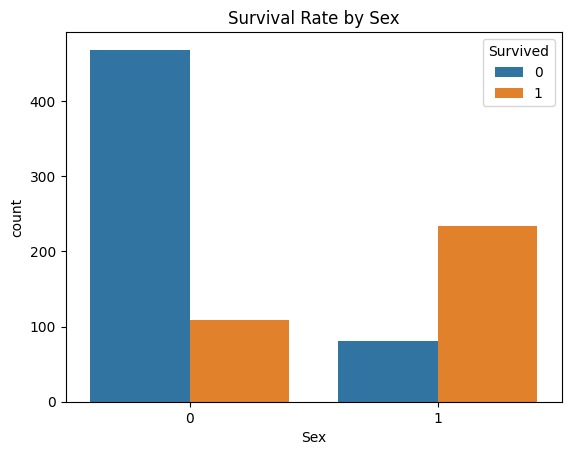

In [32]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

<Axes: xlabel='Sex'>

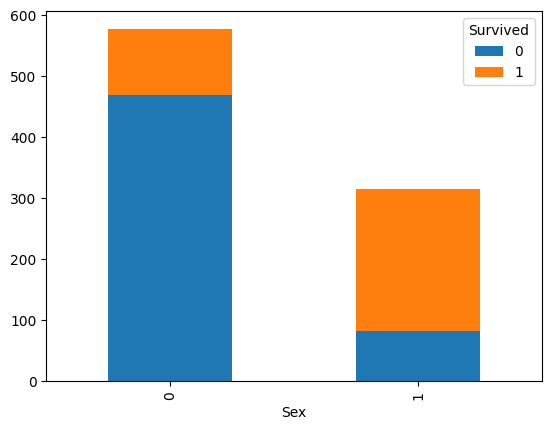

In [33]:
pd.crosstab(df.Sex, df.Survived).plot.bar(stacked = True)

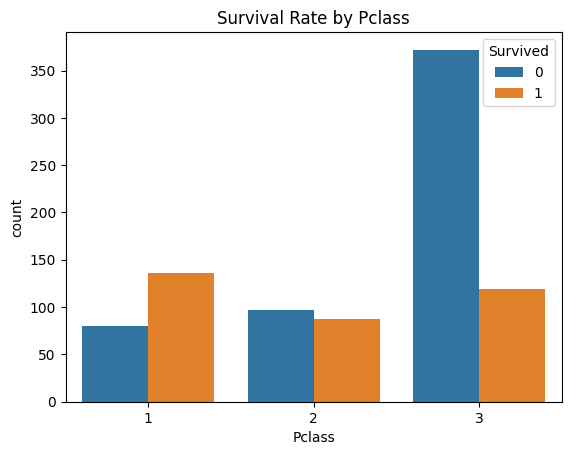

In [34]:
#Survival by Pclass
sns.countplot(x='Pclass',hue='Survived', data=df)
plt.title("Survival Rate by Pclass")
plt.show()

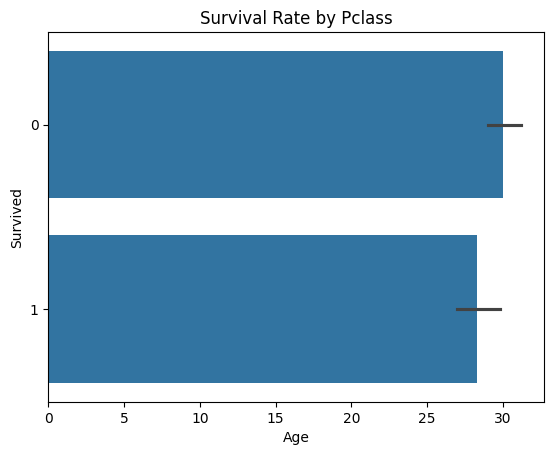

In [39]:
#Survival by Age
sns.barplot(x='Age',y='Survived', data=df)
plt.title("Survival Rate by Pclass")
plt.show()

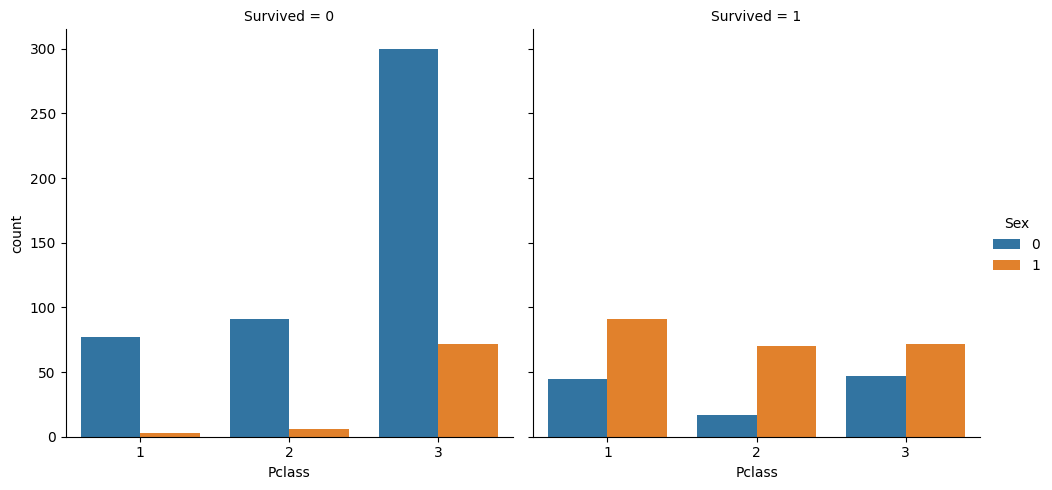

In [36]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')


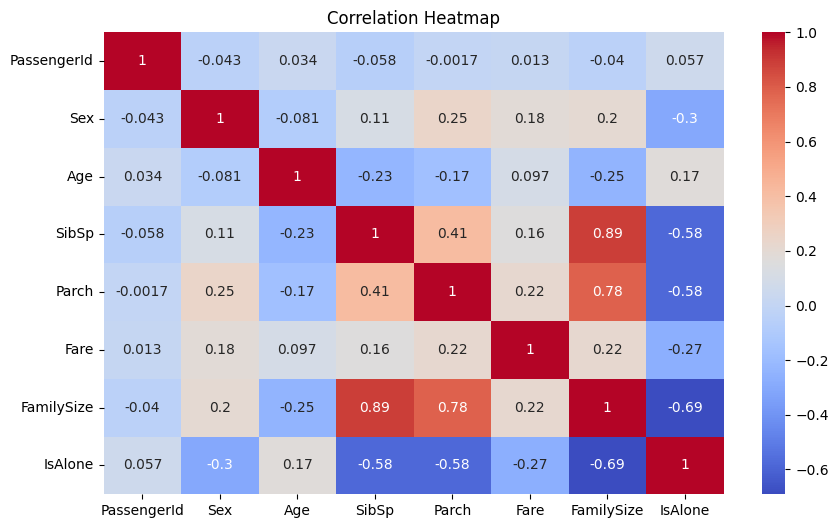

In [37]:
#correlation matrix
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

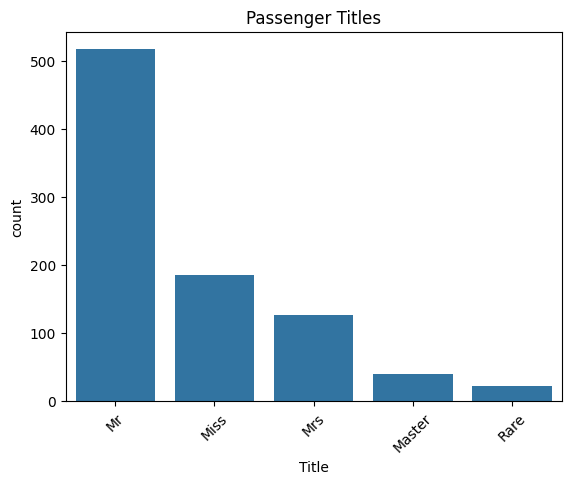

In [40]:
##Insights
#Survival by Title
# Count of passengers per title
sns.countplot(data=df, x='Title', order=df['Title'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Passenger Titles")
plt.show()

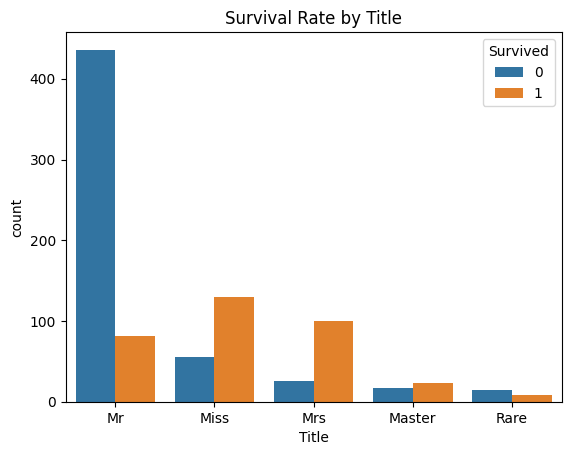

In [44]:
# Survival rate by title
sns.countplot(data=df, x='Title', hue='Survived', order=df['Title'].value_counts().index)
plt.title("Survival Rate by Title")
plt.show()

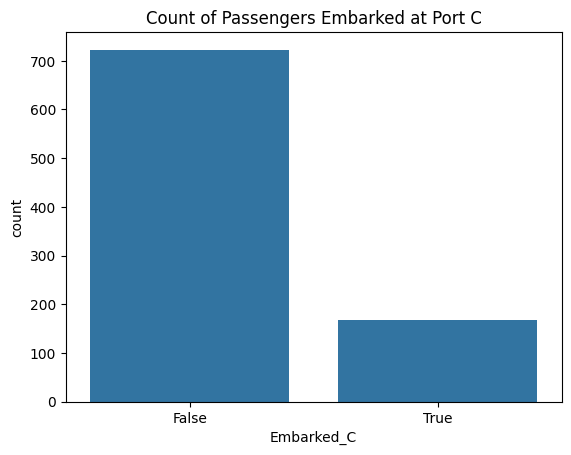

In [45]:
##Survival by Embarked Port
sns.countplot(data=df, x='Embarked_C')  # Assuming one-hot encoding was used
plt.title("Count of Passengers Embarked at Port C")
plt.show()

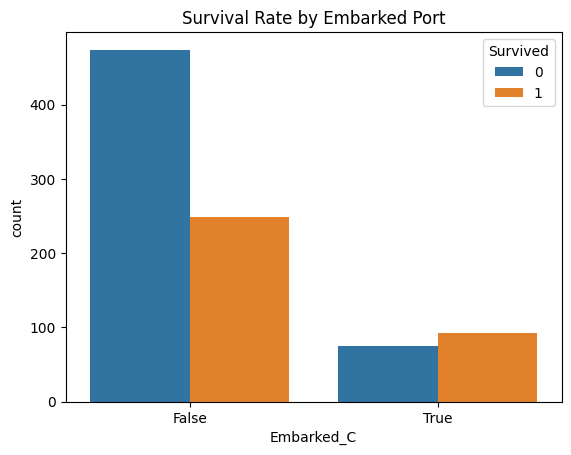

In [50]:
sns.countplot(data=df, x='Embarked_C', hue='Survived')
plt.title("Survival Rate by Embarked Port")
plt.show()

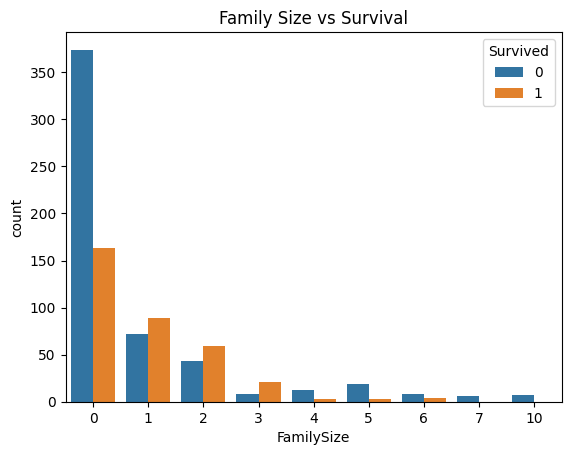

In [51]:
#Family size vs Survival
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title("Family Size vs Survival")
plt.show()

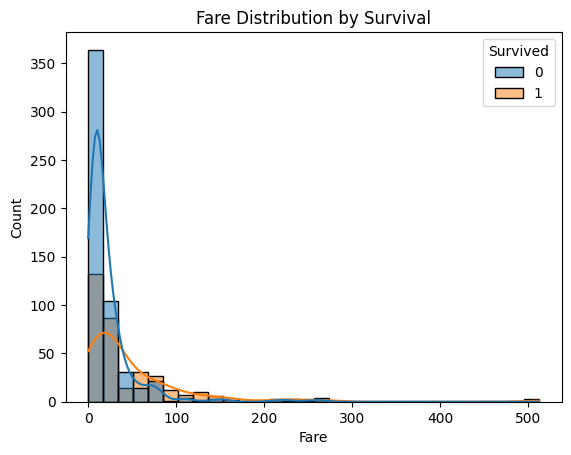

In [52]:
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=30)
plt.title("Fare Distribution by Survival")
plt.show()


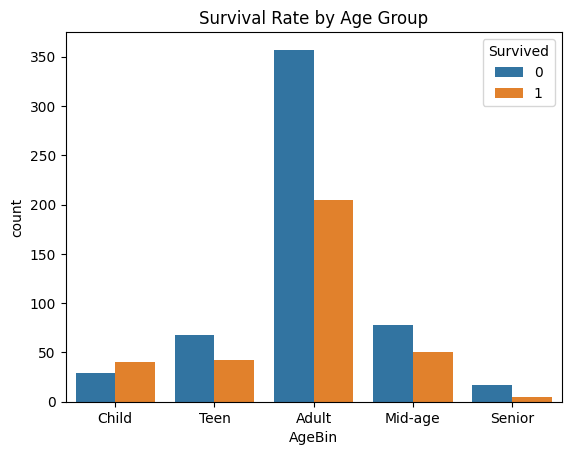

In [56]:
# Create age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Mid-age', 'Senior'])

# Plot survival by age bin
sns.countplot(data=df, x='AgeBin', hue='Survived')
plt.title("Survival Rate by Age Group")
plt.show()


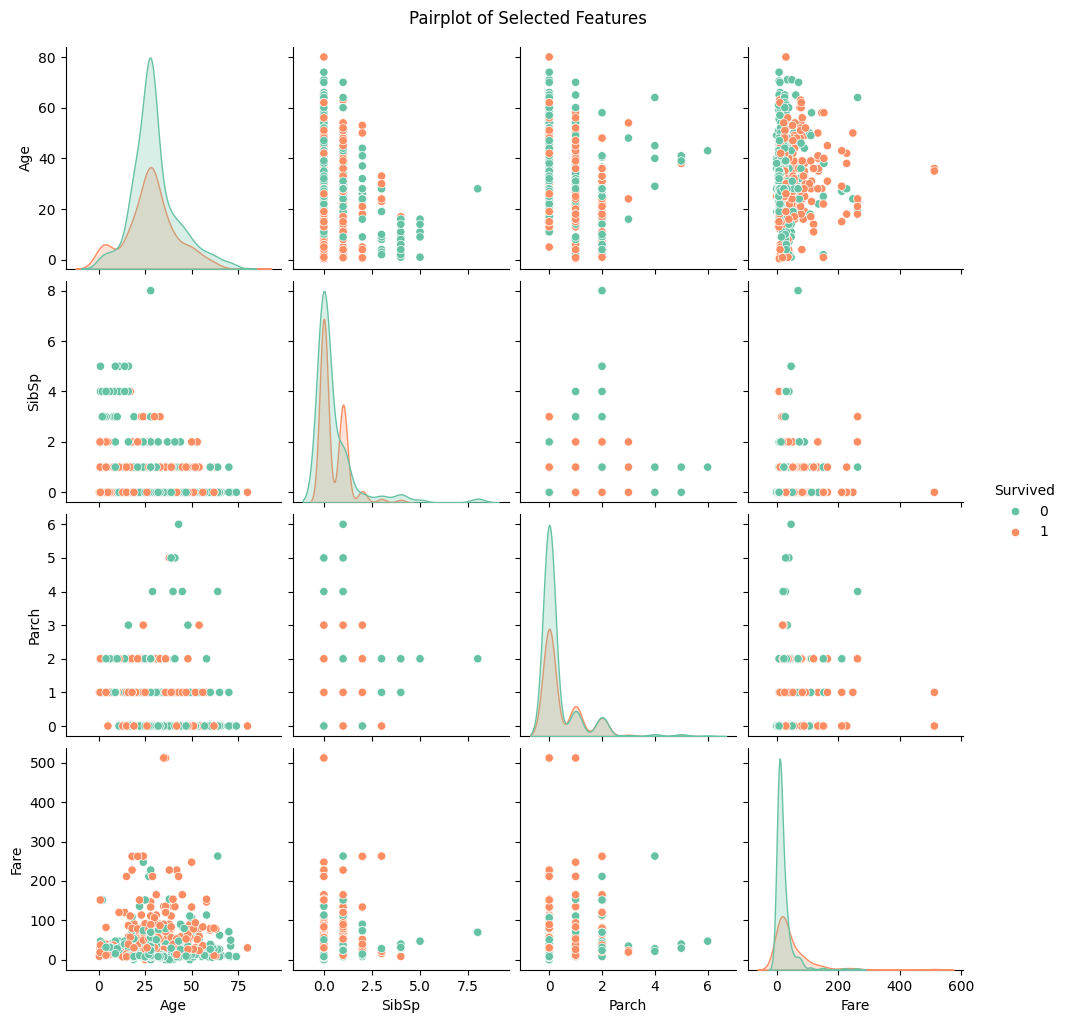

In [57]:
features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(df[features], hue='Survived', palette='Set2')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()